## Figure 5

Figure 5 (row 1) shows that high-frequencies emerge due to partial overlap, which can be avoided using a full overlap setup (row 3). 

However, constant (ones) transposed convolution filters are rarely used. Figure 5 (rows 2, 4) illustrates the effect of using non-constant filters. 

Note that even when using a full overlap setup, a periodic pattern appears at the frequency of the stride. Hence, importantly, the weight initialization issue remains. 

Also note that boundary artifacts are introduced in both cases: for partial and full overlap setups.

In [1]:
# Importing libraries..
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["figure.figsize"] = (7,6.25)

import torch
import torch.nn

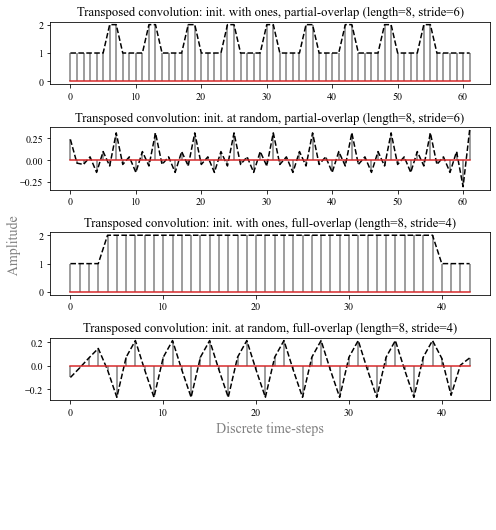

In [2]:
# Additional examples with full- and partial-overlap..

length_signal = 10

t_conv86 = torch.nn.ConvTranspose1d(in_channels=1, out_channels=1, kernel_size=8, stride=6, bias=False)
t_conv86.weight.data = torch.ones(1,1,8) # this filter is initialized with ones.
o86 = t_conv86(torch.ones(1,1,length_signal))
np86 = np.squeeze(o86.detach().numpy())

t_conv86r = torch.nn.ConvTranspose1d(in_channels=1, out_channels=1, kernel_size=8, stride=6, bias=False)
o86r = t_conv86r(torch.ones(1,1,length_signal)) # this filter is initialized at random.
np86r = np.squeeze(o86r.detach().numpy())

t_conv84 = torch.nn.ConvTranspose1d(in_channels=1, out_channels=1, kernel_size=8, stride=4, bias=False)
t_conv84.weight.data = torch.ones(1,1,8) # this filter is initialized with ones.
o84 = t_conv84(torch.ones(1,1,length_signal))
np84 = np.squeeze(o84.detach().numpy())

t_conv84r = torch.nn.ConvTranspose1d(in_channels=1, out_channels=1, kernel_size=8, stride=4, bias=False)
o84r = t_conv84r(torch.ones(1,1,length_signal)) # this filter is initialized at random.
np84r = np.squeeze(o84r.detach().numpy())

ax1 = plt.subplot(4, 1, 1)
ax1.set_title('Transposed convolution: init. with ones, partial-overlap (length=8, stride=6)', fontsize=12.8)
t = np.arange(0, len(np86))
plt.stem(t, np86, 'gray', markerfmt='k--')

ax2 = plt.subplot(4, 1, 2)
ax2.set_title('Transposed convolution: init. at random, partial-overlap (length=8, stride=6)', fontsize=12.8)
t = np.arange(0, len(np86r))
plt.stem(t, np86r, 'gray', markerfmt='k--')

ax3 = plt.subplot(4, 1, 3)
ax3.set_title('Transposed convolution: init. with ones, full-overlap (length=8, stride=4)', fontsize=12.8)
t = np.arange(0, len(np84))
plt.stem(t, np84, 'gray', markerfmt='k--')

ax4 = plt.subplot(4, 1, 4)
ax4.set_title('Transposed convolution: init. at random, full-overlap (length=8, stride=4)', fontsize=12.8)
t = np.arange(0, len(np84r))
plt.stem(t, np84r, 'gray', markerfmt='k--')
ax4.set_xlabel('Discrete time-steps', fontsize=14, color="gray")
ax4.set_ylabel('                                                                       Amplitude', fontsize=14, color="gray")

plt.tight_layout()
plt.savefig('PNGs/Figure5.png')
